In [1]:
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from collections import Counter

In [2]:
# Loading the data from the pre-processing part
clean_data = np.load('../dataset/clean_data.npy')

In [3]:
bigrams = [(int(clean_data[k][5][m][0]), int(clean_data[k][5][m+1][0])) for k in range(890) for m in range(clean_data[k][5].shape[0] - 1) ]

trigrams = [(int(clean_data[k][5][m][0]), int(clean_data[k][5][m+1][0]), int(clean_data[k][5][m+2][0])) \
            for k in range(890) for m in range(clean_data[k][5].shape[0] - 2) ]

fourgrams = [(int(clean_data[k][5][m][0]), int(clean_data[k][5][m+1][0]), int(clean_data[k][5][m+2][0]), \
              int(clean_data[k][5][m+3][0])) for k in range(890) for m in range(clean_data[k][5].shape[0] - 3) ]

In [4]:
c_bi = Counter(bigrams)
len(c_bi.most_common(20))

20

In [7]:
def plot_bigrams(big, n):
    c_bi = Counter(big)

    mc_bigrams = [c_bi.most_common(n)[k][0] for k in range(n)]
    mc_bigrams_counts = [c_bi.most_common(n)[k][1] for k in range(n)]
    
    plt.figure(1, figsize=(15,7))

    plt.stem(np.arange(n),mc_bigrams_counts)
    plt.xticks(np.arange(n), mc_bigrams)
    plt.xlabel('Bigram of chords')
    plt.ylabel('Number of those bigrams in songs')
    plt.title('Most used bigram of chords')
    plt.show()

In [8]:
def plot_trigrams(trig, n):
    c_tri = Counter(trig)

    mc_trigrams = [c_tri.most_common(n)[k][0] for k in range(n)]
    mc_trigrams_counts = [c_tri.most_common(n)[k][1] for k in range(n)]
    
    plt.figure(1, figsize=(15,7))

    plt.stem(np.arange(n),mc_trigrams_counts)
    plt.xticks(np.arange(n), mc_trigrams)
    plt.xlabel('Trigram of chords')
    plt.ylabel('Number of those trigrams in songs')
    plt.title('Most used trigram of chords')
    plt.show()

In [9]:
def plot_fourgrams(fourg, n):
    c_four = Counter(fourg)

    mc_fourgrams = [c_four.most_common(n)[k][0] for k in range(n)]
    mc_fourgrams_counts = [c_four.most_common(n)[k][1] for k in range(n)]
    
    plt.figure(1, figsize=(15,7))

    plt.stem(np.arange(n),mc_fourgrams_counts)
    plt.xticks(np.arange(n), mc_fourgrams)
    plt.xlabel('Fourgram of chords')
    plt.ylabel('Number of those fourgrams in songs')
    plt.title('Most used fourgram of chords')
    plt.show()

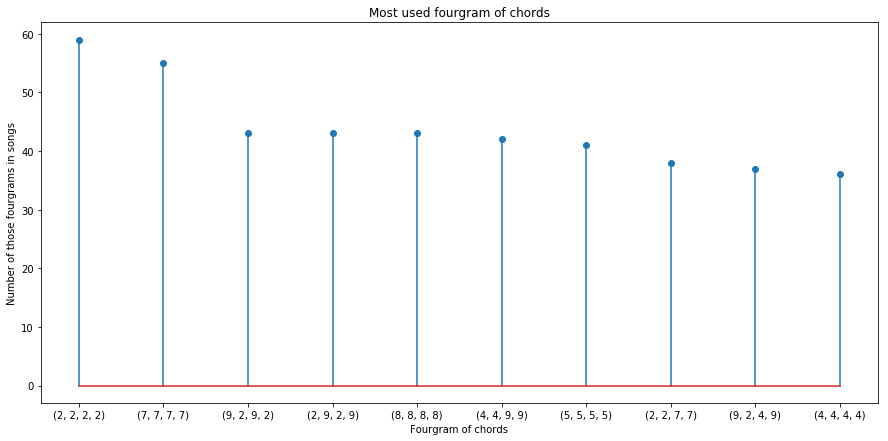

In [10]:
plot_fourgrams(fourgrams, 10)

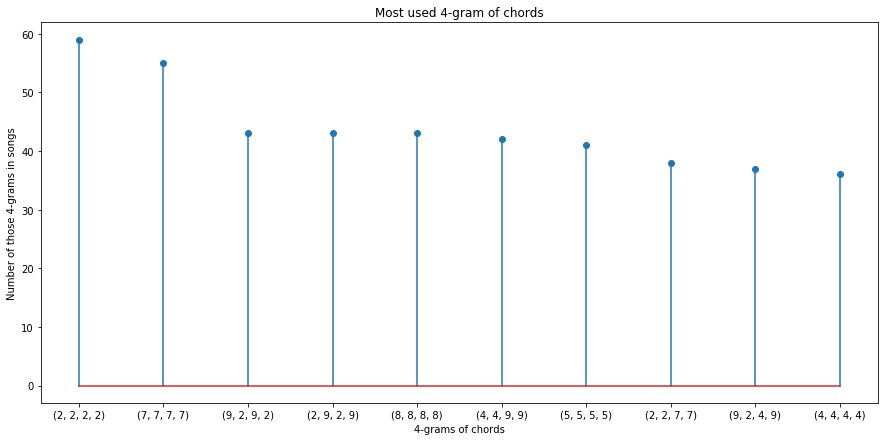

[(8, 8, 1, 1),
 (8, 1, 1, 8),
 (1, 1, 8, 8),
 (1, 8, 8, 3),
 (8, 8, 3, 3),
 (8, 3, 3, 8),
 (3, 3, 8, 8),
 (3, 8, 8, 1),
 (8, 8, 1, 6),
 (8, 1, 6, 1),
 (1, 6, 1, 1),
 (6, 1, 1, 0),
 (1, 1, 0, 10),
 (1, 0, 10, 8),
 (0, 5, 0, 0),
 (5, 0, 0, 5),
 (0, 0, 5, 7),
 (0, 5, 7, 0),
 (5, 7, 0, 5),
 (7, 0, 5, 0),
 (0, 5, 0, 0),
 (5, 0, 0, 2),
 (0, 0, 2, 0),
 (0, 2, 0, 10),
 (2, 0, 10, 5),
 (0, 10, 5, 5),
 (10, 5, 5, 10),
 (5, 5, 10, 5),
 (5, 10, 5, 10),
 (10, 5, 10, 5),
 (5, 10, 5, 5),
 (10, 5, 5, 7),
 (5, 5, 7, 7),
 (2, 2, 6, 6),
 (2, 6, 6, 7),
 (6, 6, 7, 7),
 (6, 7, 7, 4),
 (7, 7, 4, 6),
 (7, 4, 6, 7),
 (4, 6, 7, 9),
 (6, 7, 9, 2),
 (7, 9, 2, 2),
 (9, 2, 2, 6),
 (2, 2, 6, 6),
 (2, 6, 6, 7),
 (6, 6, 7, 4),
 (6, 7, 4, 9),
 (7, 4, 9, 2),
 (4, 9, 2, 2),
 (2, 2, 0, 5),
 (2, 0, 5, 7),
 (0, 5, 7, 4),
 (5, 7, 4, 9),
 (7, 4, 9, 9),
 (4, 9, 9, 2),
 (9, 9, 2, 2),
 (9, 2, 2, 0),
 (2, 2, 0, 5),
 (2, 0, 5, 7),
 (0, 5, 7, 4),
 (5, 7, 4, 9),
 (7, 4, 9, 9),
 (4, 9, 9, 9),
 (9, 9, 9, 9),
 (0, 7, 9, 7),
 (7, 9, 7, 

In [11]:
# General function for computing and plotting n-grams

def plot_n_grams(clean_data, ng, n):
    """
    This function computes and plots the n-grams of our clean data.
    clean_data is our input data
    ng is the number of chords we want in our sequences
    n is the number of n-grams we want to plot
    """
    
    ngrams = []
    
    for k in range(890):
        for m in range(clean_data[k][5].shape[0] - ng + 1):
            ngrams.append(tuple([int(clean_data[k][5][m+o][0]) for o in range(ng)]))          

    c_gram = Counter(ngrams)

    mc_grams = [c_gram.most_common(n)[k][0] for k in range(n)]
    mc_grams_counts = [c_gram.most_common(n)[k][1] for k in range(n)]
    
    plt.figure(1, figsize=(15,7))

    plt.stem(np.arange(n),mc_grams_counts)
    plt.xticks(np.arange(n), mc_grams)
    plt.xlabel('{}-grams of chords'.format(ng))
    plt.ylabel('Number of those {}-grams in songs'.format(ng))
    plt.title('Most used {}-gram of chords'.format(ng))
    plt.show()
    
    return ngrams
    
    
plot_n_grams(clean_data, 4, 10)

In [12]:
ngrams

NameError: name 'ngrams' is not defined

In [13]:
diff_bigrams = [int(clean_data[k][5][m+1][0]) - int(clean_data[k][5][m][0]) for k in range(890) for m in range(clean_data[k][5].shape[0] - 1) ]

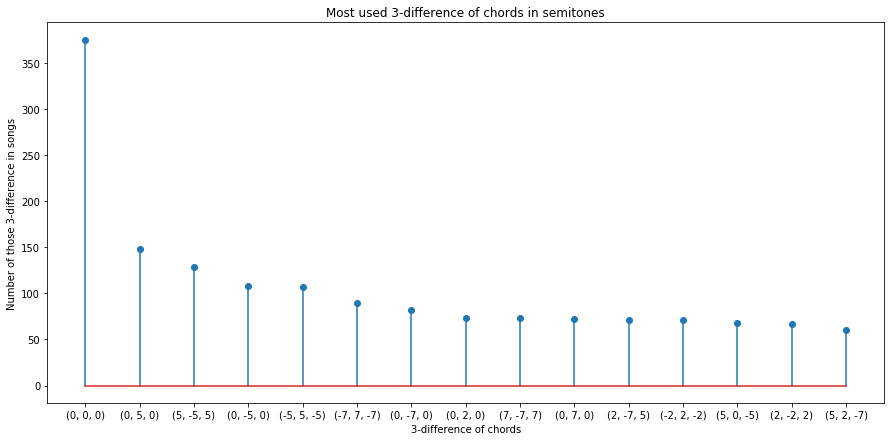

In [14]:
# General function for computing and plotting n-differences

def plot_diff_grams(clean_data, ng, n):
    """
    This function computes and plots the diff-grams of our clean data.
    clean_data is our input data
    ng is the number of chords we want in our sequences
    n is the number of n-grams we want to plot
    """
    
    diffgrams = []
    
    for k in range(890):
        for m in range(clean_data[k][5].shape[0] - ng+1):
            diffgrams.append(tuple([int(clean_data[k][5][m+o+1][0]) - int(clean_data[k][5][m+o][0]) for o in range(ng-1)]))          

    c_gram = Counter(diffgrams)

    mc_dgrams = [c_gram.most_common(n)[k][0] for k in range(n)]
    mc_dgrams_counts = [c_gram.most_common(n)[k][1] for k in range(n)]
    
    plt.figure(1, figsize=(15,7))

    plt.stem(np.arange(n),mc_dgrams_counts)
    plt.xticks(np.arange(n), mc_dgrams)
    plt.xlabel('{}-difference of chords'.format(ng-1))
    plt.ylabel('Number of those {}-difference in songs'.format(ng-1))
    plt.title('Most used {}-difference of chords in semitones'.format(ng-1))
    plt.show()
    
    
plot_diff_grams(clean_data, 4, 15)

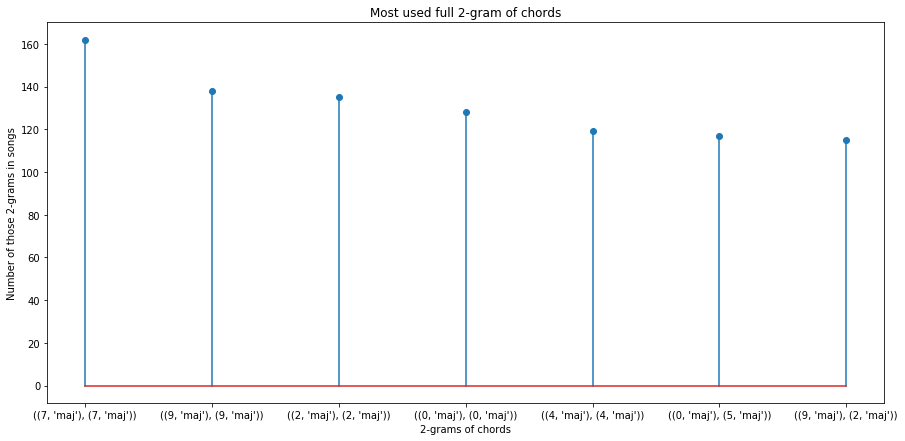

In [15]:
# General function for computing and plotting n-grams with modes

def plot_full_n_grams(clean_data, ng, n):
    """
    This function computes and plots the n-grams of our clean data with chord modes.
    clean_data is our input data
    ng is the number of chords we want in our sequences
    n is the number of n-grams we want to plot
    """
    
    ngrams = []
    
    for k in range(890):
        for m in range(clean_data[k][5].shape[0] - ng + 1):
            ngrams.append(tuple([(int(clean_data[k][5][m+o][0]), clean_data[k][5][m+o][1]) for o in range(ng)]))          

    c_gram = Counter(ngrams)
    
    mc_grams = [c_gram.most_common(n)[k][0] for k in range(n)]
    # for k in range(n):
      #   mc_grams.append(tuple([str(c_gram.most_common(n)[k][m][0][0])+', '+c_gram.most_common(n)[k][m][0][1] for m in range(ng)]))
    
    mc_grams_counts = [c_gram.most_common(n)[k][1] for k in range(n)]
    
    plt.figure(1, figsize=(15,7))

    plt.stem(np.arange(n),mc_grams_counts)
    plt.xticks(np.arange(n), mc_grams)
    plt.xlabel('{}-grams of chords'.format(ng))
    plt.ylabel('Number of those {}-grams in songs'.format(ng))
    plt.title('Most used full {}-gram of chords'.format(ng))
    plt.show()
    
    
plot_full_n_grams(clean_data, 2, 7)

# Evolution of popularity of (0,5) bigram over time

In [5]:
from datetime import datetime
year2fourgrams = dict()
ng=2

for elem in clean_data: # populate empty (to have existing keys)
    year = datetime.strptime(elem[1], '%m/%d/%Y').year
    year2fourgrams[year]=list()
    
for elem in clean_data: # populate for real
    year = datetime.strptime(elem[1], '%m/%d/%Y').year
    
    for m in range(elem[5].shape[0] - ng + 1):
        year2fourgrams[year].append(tuple([int(elem[5][m+o][0]) for o in range(ng)]))

In [6]:
year2chord05 = dict()

for year in year2fourgrams:
    year2chord05[year] = year2fourgrams[year].count(tuple((0,5))) / len(year2fourgrams[year])
    
year2chord05[year]

0.06836363636363636

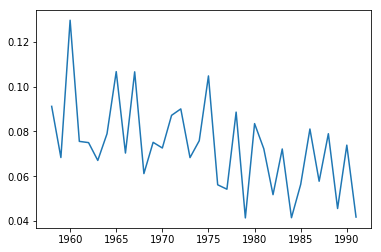

In [7]:
lists = sorted(year2chord05.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

# Popularity of modes over years

In [46]:
# Modes with their chords
ionian = np.array(( np.array(('0', "maj")), np.array(('0', "maj7")), np.array(('2', "min")), np.array(('2', "7")),np.array(('4', "min")), np.array(('4', "7")), np.array(('5', "maj")), np.array(('5', "maj7")), np.array(('7', "maj")), np.array(('7', "7")), np.array(('9', "min")), np.array(('9', "7")), np.array(('11', "min")), np.array(('11', "7"))))
dorian = np.array(( np.array(('0', "min")), np.array(('0', "7")), np.array(('2', "min")), np.array(('2', "7")),np.array(('3', "maj")), np.array(('3', "maj7")), np.array(('5', "maj")), np.array(('5', "7")), np.array(('7', "min")), np.array(('7', "7")), np.array(('9', "min")), np.array(('9', "7")), np.array(('10', "maj7")), np.array(('10', "maj"))))
phrygian = np.array(( np.array(('0', "min")), np.array(('0', "7")), np.array(('1', "maj")), np.array(('1', "maj7")),np.array(('3', "maj")), np.array(('3', "7")), np.array(('5', "min")), np.array(('5', "7")), np.array(('7', "min")), np.array(('7', "7")), np.array(('8', "maj")), np.array(('8', "maj7")), np.array(('10', "min")), np.array(('10', "7"))))
lydian = np.array(( np.array(('0', "maj")), np.array(('0', "maj7")), np.array(('2', "maj")), np.array(('2', "7")),np.array(('4', "min")), np.array(('4', "7")), np.array(('6', "min")), np.array(('6', "7")), np.array(('7', "maj")), np.array(('7', "maj7")), np.array(('9', "min")), np.array(('9', "7")), np.array(('11', "min")), np.array(('11', "7"))))
mixolydian = np.array(( np.array(('0', "maj")), np.array(('0', "7")), np.array(('2', "min")), np.array(('2', "7")),np.array(('4', "min")), np.array(('4', "7")), np.array(('5', "maj")), np.array(('5', "maj7")), np.array(('7', "min")), np.array(('7', "7")), np.array(('9', "min")), np.array(('9', "7")), np.array(('10', "maj")), np.array(('10', "maj7"))))
aelian = np.array(( np.array(('0', "min")), np.array(('0', "7")), np.array(('2', "min")), np.array(('2', "7")),np.array(('3', "maj")), np.array(('3', "maj7")), np.array(('5', "min")), np.array(('5', "7")), np.array(('7', "min")), np.array(('7', "7")), np.array(('8', "maj")), np.array(('8', "maj7")), np.array(('10', "maj")), np.array(('10', "7"))))
locrian = np.array(( np.array(('0', "min")), np.array(('0', "7")), np.array(('1', "maj")), np.array(('1', "maj7")),np.array(('3', "min")), np.array(('3', "7")), np.array(('5', "min")), np.array(('5', "7")), np.array(('6', "maj")), np.array(('6', "maj7")), np.array(('8', "maj")), np.array(('8', "7")), np.array(('10', "min")), np.array(('10', "7"))))

# Data structure conversion
ionian = list(map(tuple, ionian))
dorian = list(map(tuple, dorian))
phrygian = list(map(tuple, phrygian))
lydian = list(map(tuple, lydian))
mixolydian = list(map(tuple, mixolydian))
aelian = list(map(tuple, aelian))
locrian = list(map(tuple, locrian))

In [57]:
def song_mode(chords, mode):
    '''
    Function to compute proportion of chords in a song, that belong to the given mode.
    '''
    match_chords = 0
    for chord in chords:
        if(chord in mode):
            match_chords += 1

    return match_chords/len(chords)

def year2mode(clean_data, mode):
    '''
    Function to compute the average % utilisation of a mode over the years
    '''
    from datetime import datetime
    year2ionian = dict()

    for elem in clean_data: # populate empty (to have existing keys)
        year = datetime.strptime(elem[1], '%m/%d/%Y').year
        year2ionian[year]=list()

    for elem in clean_data: # populate for real
        year = datetime.strptime(elem[1], '%m/%d/%Y').year
        year2ionian[year].append(song_mode(list(map(tuple, elem[5])), mode))

    for year in year2fourgrams: # computing the means for each year
        year2ionian[year] = np.mean(year2ionian[year])
        
    return year2ionian

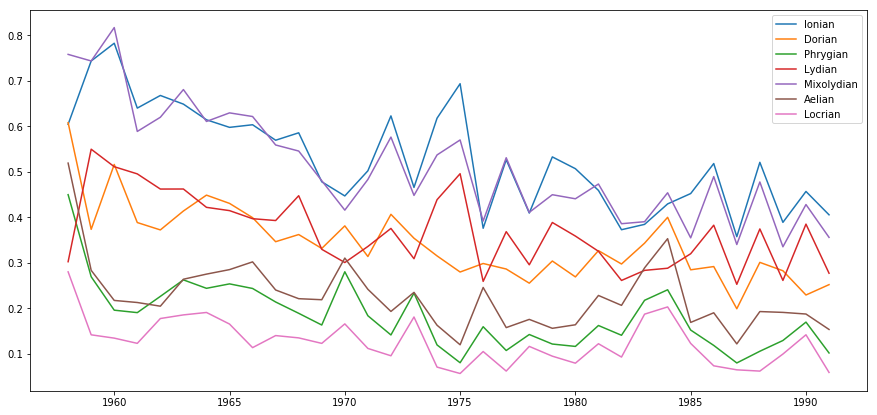

In [70]:
# Dictionaries of year to mode proportions
year2ionian = year2mode(clean_data, ionian)
year2dorian = year2mode(clean_data, dorian)
year2phrygian = year2mode(clean_data, phrygian)
year2lydian = year2mode(clean_data, lydian)
year2mixolydian = year2mode(clean_data, mixolydian)
year2aelian = year2mode(clean_data, aelian)
year2locrian = year2mode(clean_data, locrian)
    
# plotting
plt.figure(1, figsize=(15,7))

lists = sorted(year2ionian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Ionian')

lists = sorted(year2dorian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Dorian')

lists = sorted(year2phrygian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Phrygian')

lists = sorted(year2lydian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Lydian')

lists = sorted(year2mixolydian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Mixolydian')

lists = sorted(year2aelian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Aelian')

lists = sorted(year2locrian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Locrian')

plt.legend()

plt.show()